In [17]:
# Essential Libraries
import pandas as pd
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, make_scorer,  precision_score,  recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
# Initialize JavaScript for SHAP visualizations
shap.initjs()

#### Borda Scoial Choice for Selecting top 3 common features of soil

In [140]:
# from collections import Counter 
# from collections import defaultdict


# def borda_count_top3(*ranked_lists):
#     # Assume each list is a voter's ranked preferences (highest to lowest)
#     scores = defaultdict(int)
    
#     for voter_list in ranked_lists:
#         n = len(voter_list)
#         for rank, candidate in enumerate(voter_list):
#             # Top candidate gets n points, next gets n-1, ..., last gets 1
#             scores[candidate] += n - rank
    
#     # Print final aggregate scores
#     print("Final aggregate scores:")
#     for candidate, score in sorted(scores.items(), key=lambda x: x[1], reverse=True):
#         print(f"{candidate}: {score}")
    
#     # Sort candidates by total score, descending
#     sorted_candidates = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
#     # Return top 3 candidates
#     return [candidate for candidate, score in sorted_candidates[:3]]

# #### For Aviti, Soil, RandomForest #####
# # list1 = ['Roseimaritima',"Croceibacterium","SWB02","Fermentimonas","Hyphomicrobium",
# #     "Planctopirus","Azotobacter","Ideonella","Spirochaeta 2","Candidatus Solibacter",
# #     "Oligoflexus" ,"Ureibacillus"]
# # list2 = ["SWB02","Roseimaritima","Croceibacterium","Ideonella", "Hyphomicrobium",
# #     "Fermentimonas","Planctopirus","Azotobacter","Candidatus Solibacter","Spirochaeta 2",
# #     "Oligoflexus","Ureibacillus"]
# # list3 = ["Ideonella","Planctopirus","Azotobacter","Roseimaritima","SWB02","Croceibacterium",
# #             "Fermentimonas","Hyphomicrobium","Spirochaeta 2","Candidatus Solibacter","Oligoflexus"
# #              ,"Ureibacillus"]
# #### For Miseq, Soil, RandomForest #####
# # list1 = ["Croceibacterium","CL500-3","Dokdonella","SWB02","Gemmata","Arsenicitalea","Sphingorhabdus"
# #     ,"Bradyrhizobium","Pseudomonas","Shinella","Acidibacter"]
# # list2 = ["SWB02","Pseudomonas","Arsenicitalea","Croceibacterium","Dokdonella","CL500-3","Sphingorhabdus",
# #          "Gemmata","Shinella","Bradyrhizobium","Acidibacter"]
# # list3 = ["Sphingorhabdus","Shinella","SWB02","Pseudomonas","CL500-3","Acidibacter","Dokdonella",
# # "Croceibacterium","Gemmata","Arsenicitalea","Bradyrhizobium"]
# #### For Novaseq, Soil, RandomForest #####
# # list1 = ["Ketobacter","Candidatus Berkiella", "Plot4-2H12","Inhella", "Rhodopila","Runella","IS-44",
# # "Subgroup 10","Bauldia","Hydrogenispora","Dyadobacter","Brevifollis","Ruminofilibacter"]
# # list2 = ["Inhella","Plot4-2H12","Candidatus Berkiella","Ketobacter","Runella","Rhodopila","Bauldia",
# # "Subgroup 10","Dyadobacter","IS-44","Brevifollis","Hydrogenispora","Ruminofilibacter"]
# # list3 = ["Inhella","Plot4-2H12","Runella","Candidatus Berkiella","Rhodopila","Ketobacter","Bauldia",
# # "Subgroup 10","Dyadobacter","Brevifollis","IS-44","Ruminofilibacter","Hydrogenispora"]

# #### For Aviti, Soil, SVM #####
# # list1 = ["SWB02","Croceibacterium","Opitutus","Gemmata","Hyphomicrobium","Fimbriiglobus","Cellvibrio","YC-ZSS-LKJ147",
# # "BIyi10","Candidatus Solibacter","Agrobacterium","Streptomyces","Ideonella","Acidovorax","Polycyclovorans","Spirochaeta 2"]
# # list2 = ["SWB02", "Gemmata", "Polycyclovorans", "Croceibacterium", "Ideonella","Streptomyces","Opitutus", "Hyphomicrobium",
# # "Fimbriiglobus", "BIyi10", "Agrobacterium", "Candidatus Solibacter","Cellvibrio", "Spirochaeta 2","Acidovorax","YC-ZSS-LKJ147"]
# # list3 = ["SWB02", "Ideonella", "Opitutus", "Polycyclovorans","Gemmata", "Hyphomicrobium","YC-ZSS-LKJ147", "Streptomyces",
# # "Croceibacterium", "Agrobacterium", "Acidovorax", "Cellvibrio","BIyi10", "Candidatus Solibacter", "Fimbriiglobus", "Spirochaeta 2"]
# #### For Miseq, Soil, SVM #####
# # list1 = ["SWB02","Pseudomonas","Steroidobacter","Acidibacter","Ellin6067","Polycyclovorans","Luteolibacter","MND1"]
# # list2 = ["Steroidobacter","Pseudomonas","Acidibacter", "SWB02","Luteolibacter","Ellin6067","MND1","Polycyclovorans"]
# # list3 = ["SWB02", "Pseudomonas", "Acidibacter", "Steroidobacter", "Luteolibacter","Ellin6067","Polycyclovorans","MND1"]
# #### For Novaseq, Soil, SVM #####
# list1 = ["Subgroup 10", "Fimbriiglobus", "Bauldia", "BIyi10", "IS-44",
# "Candidatus Berkiella", "Ketobacter", "Arenimonas", "Ferribacterium",
# "Pararhizobium", "Afipia", "Dyadobacter", "DSSD61", "Dechloromonas","Hydrogenispora", "Inhella"]
# list2 = ["Fimbriiglobus", "Subgroup 10", "Dechloromonas", "IS-44", "BIyi10",
# "Inhella", "Arenimonas", "Pararhizobium", "Bauldia", "Candidatus Berkiella",
# "DSSD61", "Ferribacterium", "Dyadobacter", "Hydrogenispora","Afipia", "Ketobacter"]
# list3 = ["Bauldia", "Subgroup 10", "Fimbriiglobus", "Inhella", "Pararhizobium",
# "Dechloromonas", "Arenimonas", "IS-44", "Hydrogenispora", "Dyadobacter",
# "Ferribacterium", "Candidatus Berkiella", "DSSD61", "BIyi10","Afipia", "Ketobacter"]

# # common_elements = list(set(list1) & set(list2) & set(list3))
# print("Repeated in all three lists:", common_elements)
# print(borda_count_top3(list1, list2, list3))


#### Aim
To compare the ability of three different sequencing technologies in classifying soils of different origin (that underwent different treatments)

#### In each of the main dataset files (e.g. Aviti_raw_data.txt):
- Rows = Genus (features)
- Columns = Sample names (numbers like 1, 2, 3, ..., 36)
  
#### In the metadata/label file (Metadata.xlsx):
- First column = Sample names (but with extra characters, e.g., "T1-2", etc.)
- Second column onward = treatment/condition type (categorical label)

Genus  Bacteroides  Lachnospira  Cytophaga     SM1A02  I-8  Sphaerobacter  \
1              0.0          0.0   0.000000   6.535572  0.0            0.0   
2              0.0          0.0   0.000000  41.030348  0.0            0.0   
3              0.0          0.0   0.000000   3.293010  0.0            0.0   
4              0.0          0.0   0.000000  27.396973  0.0            0.0   
5              0.0          0.0   4.955032  26.426835  0.0            0.0   

Genus  Candidatus Omnitrophus  Aquihabitans  Teretinema  Salinispira  ...  \
1                    4.357048     21.785240         0.0          0.0  ...   
2                    0.000000      0.000000         0.0          0.0  ...   
3                    0.000000      0.000000         0.0          0.0  ...   
4                    0.000000     93.726487         0.0          0.0  ...   
5                    0.000000      0.000000         0.0          0.0  ...   

Genus  Leptospira   Truepera  Chthonomonas  Armatimonas  Micropepsis  \
1 

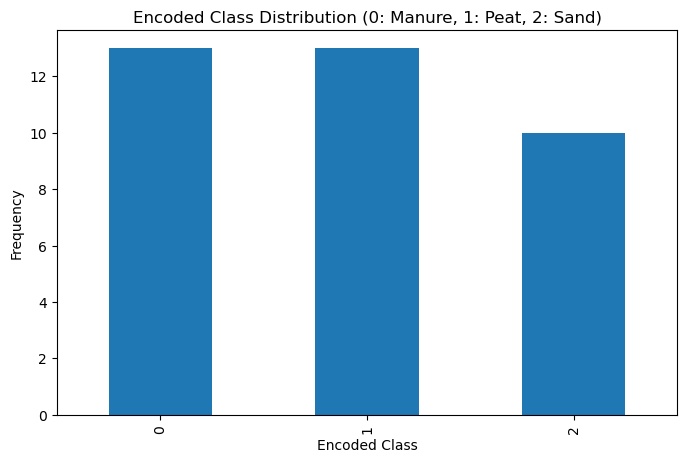

Columns with missing values: []

Number of features with 0.0 importance: 456
Features with 0.0 importance: ['Bacteroides', 'Lachnospira', 'Cytophaga', 'SM1A02', 'I-8', 'Sphaerobacter', 'Candidatus Omnitrophus', 'Aquihabitans', 'Teretinema', 'Salinispira', 'Spirochaeta 2', 'Spirochaeta', 'Methanosarcina', 'Vulgatibacter', 'Phycisphaera', 'Tepidisphaera', 'AKYG587', 'Nitrospira', 'Dinghuibacter', 'Terrimonas', 'Niastella', 'Haliscomenobacter', 'Ferruginibacter', 'Aurantisolimonas', 'Sediminibacterium', 'Gynurincola', 'Niabella', 'Puia', 'Panacibacter', 'Chitinophaga', 'Flavisolibacter', 'Segetibacter', 'Lacibacter', 'Solitalea', 'Parafilimonas', 'Flavitalea', 'Paraflavitalea', 'UTBCD1', 'Flavihumibacter', 'Agriterribacter', 'Pseudoflavitalea', 'Parasegetibacter', 'Phaeodactylibacter', 'Pedobacter', 'Daejeonella', 'Sphingobacterium', 'Aureispira', 'Mucilaginibacter', 'Arcticibacter', 'TM7a', 'Aggregatilinea', 'Anaerolinea', 'Bdellovibrio', 'Pseudobdellovibrio', 'UTCFX1', 'Oligoflexus', 'P

In [43]:
# Load and transpose the main data
##### Load Raw data (1) #####
# Aviti_raw_data (no normalization done)
# X = pd.read_csv('Aviti_raw_data.txt', delimiter='\t', index_col=0).T
# Miseq_raw_data
# X = pd.read_csv('Miseq_raw_data.txt', delimiter='\t', index_col=0).T
# Novaseq_raw_data
# X = pd.read_csv('Novaseq_raw_data.txt', delimiter='\t', index_col=0).T

##### Load Normalized data, using percentage (2) #####
# Aviti Normalized data 
# X = pd.read_csv('Aviti_perc_data.txt', delimiter='\t', index_col=0).T
# Miseq Normalized data 
# X = pd.read_csv('Miseq_perc_data.txt', delimiter='\t', index_col=0).T
# Novaseq Normalized data 
# X = pd.read_csv('Novaseq_perc_data.txt', delimiter='\t', index_col=0).T


##### Load Normalized data, using DESeq2 software (3) #####
# Aviti Normalized data 
# X = pd.read_csv('Aviti_DESeq2_normalized_data.txt', delimiter='\t', index_col=0).T
# Miseq Normalized data 
X = pd.read_csv('Miseq_DESeq2_normalized_data.txt', delimiter='\t', index_col=0).T
# Novaseq Normalized data 
# X = pd.read_csv('Novaseq_DESeq2_normalized_data.txt', delimiter='\t', index_col=0).T

print(X.head())

X.index = X.index.astype(str)

# Load metadata
metadata = pd.read_excel('Metadata.xlsx')

# Extract digits after the first 3 characters
metadata['Sample_num'] = metadata['Sample_name'].astype(str).str.slice(3).str.extract(r'(\d+)')[0]

# Create a mapping from numeric sample name → soil type
sample_to_condition = dict(zip(metadata['Sample_num'], metadata['Soil']))
# Create a mapping from numeric sample name → Autoclave type
# sample_to_condition = dict(zip(metadata['Sample_num'], metadata['Autoclave']))
# Create a mapping from numeric sample name → Heat root type
# sample_to_condition = dict(zip(metadata['Sample_num'], metadata['Heat root']))

# Map sample names in X to soil types
y_raw = X.index.map(sample_to_condition)

# Keep only samples with valid labels
valid_samples = y_raw.notna()
X = X[valid_samples]
y_raw = y_raw[valid_samples]
feature_names = X.columns.tolist()
# Encode soil types
le = LabelEncoder()
y = le.fit_transform(y_raw)
print(dict(zip(le.classes_, le.transform(le.classes_))))

# Create a DataFrame showing sample names and their labels ---> for debugging purpose
labels_df = pd.DataFrame({
    'Sample_Name': X.index,
    'Soil_Type': y_raw.values,
    'Soil_Label': y
})

# Display the result
print("🧾 Sample names with their respective labels:")
print(labels_df)



print("Encoded Class Distribution:")
print(pd.Series(y).value_counts())
# Plot the class distribution
plt.figure(figsize=(8, 5))
pd.Series(y).value_counts().plot(kind='bar')
# when condition = soil
plt.title('Encoded Class Distribution (0: Manure, 1: Peat, 2: Sand)')
#  when condition = autoclave or Heat root
# plt.title('Encoded Class Distribution (0: No, 1: Yes)')
plt.xlabel('Encoded Class')
plt.ylabel('Frequency')
plt.show()

# Check for missing values --> none
print(f"Columns with missing values: {X.columns[X.isnull().any()].tolist()}")
# Feature selection ------------------>??
rf = RandomForestClassifier(n_estimators=15, random_state=42)
rf.fit(X, y)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
# Count the number of features with 0.0 importance and print their names -----> only 46 is important out of 1017 when label is soil
zero_importance_features = feature_importances[feature_importances == 0.0].index.tolist()
print(f"\nNumber of features with 0.0 importance: {len(zero_importance_features)}")
print("Features with 0.0 importance:", zero_importance_features)
print("\nFeature Importances:")
# print(feature_importances.sort_values(ascending=False))
# Remove zero importance features from X
X = X.drop(columns=zero_importance_features) 
feature_names_reduced = X.columns.tolist()
print("\nX_reduced.shape is ", X.shape)
print("\nX_reduced names.shape is ", len(feature_names_reduced))
print(feature_names_reduced)

## 😁these are the shap features calculated from the "REDUCED Normalized FEATURES Version2 ----> LSVM"😁
#### SHAP, Union of Aviti's soil features within 3 groups (uniques only) 🍳
# desired_columns = ['Azotobacter', 'Labrys', 'Chthonobacter', 'Ideonella', 'Sphingorhabdus', 'Agrobacterium', 'Acidovorax', 'YC-ZSS-LKJ147',
# 'Parafilimonas', 'Gemmata', 'Sneathiella', 'Fimbriiglobus', 'C1-B045', 'Methylobacter', 'BIyi10', 'SWB02', 'Polycyclovorans', 'Croceibacterium',
# 'Candidatus Solibacter', 'Hyphomicrobium', 'Cellvibrio', 'Spirochaeta 2', 'Streptomyces', 'Opitutus']
#### SHAP, 3 top common features of Aviti's soil, using Borda count 🍳
# desired_columns =['SWB02', 'Gemmata', 'Opitutus']
## SHAP, Aviti Autoclave 🍕
# desired_columns= ["Flavobacterium","Sphingomonas","Arenimonas","Hassallia","Methylobacter","Ramlibacter","Rubrivivax",
#     "Gemmata","Stenotrophobacter","Pelotalea","Sediminibacterium","Paucibacter","UBA6140","Iamia","Acidiferrimicrobium",
#     "Hirschia","Niastella","Pseudorhodoplanes","Reyranella","Conexibacter"]
# #### SHAP, Aviti HeatRoot 🎃
# desired_columns = ["Terrimonas","Chryseotalea","Subgroup 10" ,"MND1","Arenimonas","Ramlibacter","Bradyrhizobium",
# "Sediminibacterium","Devosia","Gemmatimonas","Cellvibrio","Ohtaekwangia","Luteolibacter","YC-ZSS-LKJ147","Ferribacterium",
# "Algoriphagus","Variovorax", "Lentzea","Rhizobacter","Massilia"]

#### SHAP, Union of Miseq's soil features within 3 groups (uniques only) 🍳
# desired_columns = ['Ilumatobacter', 'CL500-3', 'Ohtaekwangia','Arsenicitalea', 'Dechloromonas', 'Geomonas', 'Pirellula', 'Sphingorhabdus',
# 'Paludibaculum', 'Dokdonella', 'Ellin6067', 'Acidibacter', 'Rubrivivax', 'Gemmata', 'Pedomicrobium', 'OLB12', 'MND1', 'Sphingomonas',
# 'Pseudomonas', 'SWB02', 'Polycyclovorans', 'Croceibacterium', 'JGI 0001001-H03', 'Kineobactrum', 'Oleiharenicola', 'Steroidobacter',
# 'Methylophilus', 'Shinella', 'Opitutus', 'Luteolibacter']
#### SHAP, 3 top common features of Miseq's soil, using Borda count 🍳
# desired_columns =['SWB02', 'Pseudomonas', 'Steroidobacter']
## SHAP, Miseq Autoclave 🍕
# desired_columns = ["IS-44","Dokdonella","Methylobacillus","Candidatus Solibacter","Ferruginibacter","Chthoniobacter","Devosia",
# "Hirschia","Bauldia","Ramlibacter","Chryseotalea","Phenylobacterium","Ellin6055","YC-ZSS-LKJ147","Panacibacter","Ellin517",
# "Luteolibacter",    "Pir4 lineage",    "Rhodoplanes","mle1-7"]
#### SHAP, Miseq HeatRoot 🎃
# desired_columns = ["UBA6140","Pseudomonas","Methylotenera","Oleiharenicola","Opitutus", "Croceibacterium","Candidatus Solibacter",
# "Dongia","MND1","Steroidobacter","Ilumatobacter","YC-ZSS-LKJ147","Pirellula","Sphingomonas","Subgroup 10","Reyranella",
# "Hassallia","Phenylobacterium","Chryseotalea","Ellin6067"]

#### SHAP, Union of Novaseq's soil features within 3 groups (uniques only) 🍳
# desired_columns = ['Subgroup 10', 'Dyadobacter', 'Dechloromonas', 'Inhella', 'Leeia', 'Pararhizobium', 'Arenimonas', 'Plot4-2H12',
# 'Microbacterium', 'Afipia', 'Hydrogenispora', 'Fimbriiglobus', 'Constrictibacter', 'Brevifollis', 'BIyi10', 'Candidatus Berkiella',
# 'DSSD61', 'Pseudarthrobacter', 'Bauldia', 'Ferribacterium', 'IS-44', 'Methyloceanibacter', 'Ketobacter']
#### SHAP, 3 top common features of Novaseq's soil, using Borda count 🍳
# desired_columns =['Subgroup 10', 'Fimbriiglobus', 'Bauldia']
#### SHAP, Novaseq autoclave 🍕
# desired_columns =["Ramlibacter","Gemmata","BIyi10","Novosphingobium","TM7a","Methylobacillus","Pseudomonas",
# "Algoriphagus","Marinoscillum","CL500-3","Subgroup 10","Kribbella","Aminobacter","Mesobacillus","Agrobacterium",
# "Cupriavidus","Asticcacaulis","Candidatus Protochlamydia","Niallia","Neobacillus"]
#### SHAP, Novaseq HeatRoot 🎃
# desired_columns = ["Shinella","CL500-3","Novosphingobium","Hassallia","Ahniella","Aquicella","Ferruginibacter","BIyi10",
# "Curvibacter","Acinetobacter","Chryseotalea","Rhodovastum","Solirubrobacter","Anaerolinea","Aeromicrobium","Candidatus Nitrosoarchaeum",
# "Steroidobacter","Algoriphagus","Noviherbaspirillum","Candidatus Omnitrophus"]




# uncomment the following line if you choose SHAP features in "desired_columns" and not al features ones.
# X = X[desired_columns]
print(X.head())
# print(X_reduced.head())

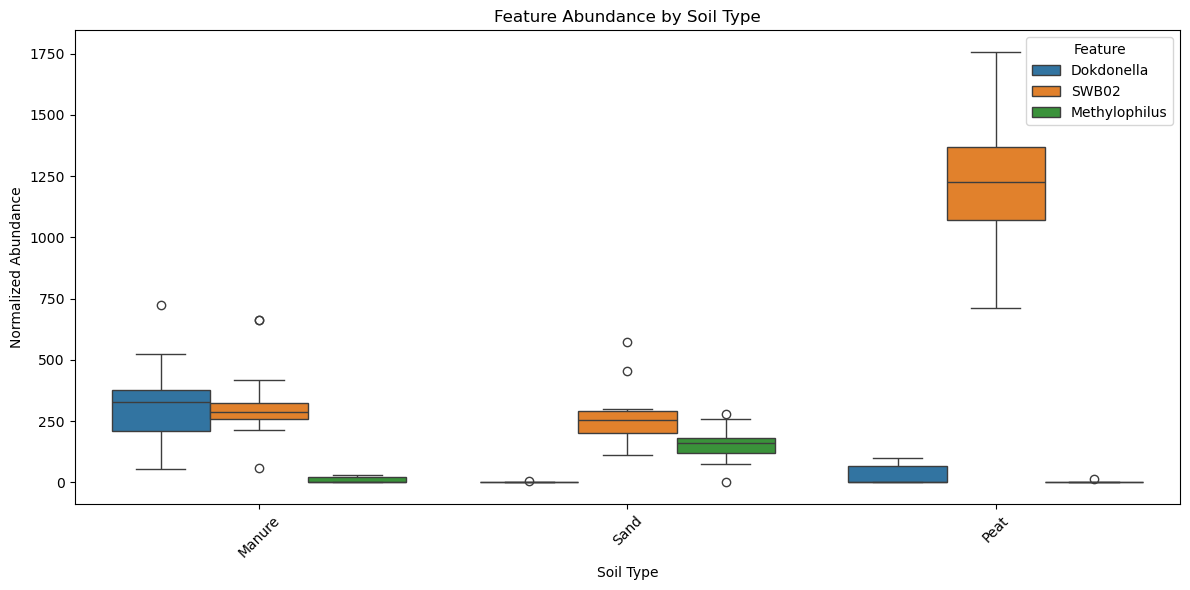

🧮 Number of samples per soil type:
Soil_Type
Manure    13
Peat      13
Sand      10
Name: count, dtype: int64


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Aviti, soil, RandomForest, SHAP
# selected_features = ['Roseimaritima','Croceibacterium','SWB02']
## Miseq, soil, RandomForest, SHAP
# selected_features = ['Croceibacterium','CL500-3', 'SWB02']
## Novaseq, soil, RandomForest, SHAP
# selected_features =['Candidatus Berkiella', 'Plot4-2H12', 'Inhella']
## Aviti, soil, LSVM, SHAP
# selected_features =['SWB02', 'Opitutus', 'Gemmata']
## Miseq, soil, LSVM, SHAP
# selected_features =['SWB02', 'Pseudomonas', 'Steroidobacter']
## Novaseq, soil, LSVM, SHAP
# selected_features =['Subgroup 10', 'Fimbriiglobus', 'Bauldia']
###### shapG ones #######
## Aviti, soil, RandomForest, shapG
# selected_features =['Pusillibacter', 'Chthonobacter', 'SWB02']
## Miseq, soil, RandomForest, shapG
# selected_features = ['Bradyrhizobium', 'Ilumatobacter']
## Novaseq, soil, RandomForest, shapG
# selected_features =['Plot4-2H12', 'Candidatus Berkiella', 'Runella']
## Aviti, soil, LSVM, shapG
# selected_features =['BIyi10', 'Chthonobacter', 'SWB02']
## Miseq, soil, LSVM, shapG
selected_features = ['Dokdonella','SWB02', 'Methylophilus']
## Novaseq, soil, LSVM, shapG
# selected_features = ["Methyloceanibacter","Constrictibacter","Plot4-2H12"]

# Combine selected features and soil type into one DataFrame
plot_df = X[selected_features].copy()
plot_df["Soil_Type"] = y_raw.values  # y_raw maps sample to soil type

# Melt the DataFrame to long format for seaborn
melted_df = plot_df.melt(id_vars="Soil_Type", var_name="Feature", value_name="Abundance")

# Create boxplots grouped by soil type for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(x="Soil_Type", y="Abundance", hue="Feature", data=melted_df)
plt.title("Feature Abundance by Soil Type")
plt.xlabel("Soil Type")
plt.ylabel("Normalized Abundance")
plt.xticks(rotation=45)
plt.legend(title="Feature")
plt.tight_layout()
plt.show()
# Count number of samples per soil type
soil_counts = plot_df["Soil_Type"].value_counts()
print("🧮 Number of samples per soil type:")
print(soil_counts)


In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# selected_features = ["Methyloceanibacter", "Constrictibacter", "Plot4-2H12"]

# # Combine selected features and soil type into one DataFrame
# plot_df = X[selected_features].copy()
# plot_df["Soil_Type"] = y_raw.values

# # Melt the DataFrame to long format for seaborn
# melted_df = plot_df.melt(id_vars="Soil_Type", var_name="Feature", value_name="Abundance")

# # Loop through each soil type and plot separately
# for soil in melted_df["Soil_Type"].unique():
#     subset = melted_df[melted_df["Soil_Type"] == soil]
    
#     plt.figure(figsize=(8, 6))
#     sns.boxplot(x="Feature", y="Abundance", data=subset)
#     plt.title(f"Feature Abundance in Soil Type: {soil}")
#     plt.xlabel("Feature")
#     plt.ylabel("Normalized Abundance")
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


In [62]:
#### Using SHAP Features instead of All features, using "unnormalized" data
## SHAP, Union of Aviti's soil features within 3 groups (uniques only) 🍳
# # desired_columns=['Acidovorax', 'Actinoplanes','Arenibacter', 'Azotobacter','BIyi10', 'Confluentibacter', 'Croceicoccus', 
#  'Crocinitomix', 'Denitratisoma', 'Ferrovibrio', 'Flavobacterium', 'Gemmobacter','Ideonella', 'Ignavibacterium', 'Ilumatobacter',
# 'JTB255 marine benthic group','Kribbella', 'Leptothrix', 'Phreatobacter', 'Planktosalinus','Pusillibacter', 'Roseomonas',
# 'Ruminofilibacter', 'Rurimicrobium', 'Shinella', 'Sphingosinicella', 'Thermobispora']
## SHAP, Aviti Autoclave 🍕
# desired_columns=[ 'Ammoniphilus','Neobacillus','Inquilinus','Crocinitomix','Asticcacaulis','Opitutus',
#                  'Reyranella','FFCH7168','Spirochaeta 2','Achromobacter', 'Prosthecobacter','YC-ZSS-LKJ147',
#                  'Rhodoplanes', 'UTCFX1','Cephaloticoccus','Pseudoxanthobacter','Aquisphaera','Duganella','Microvirga','Bauldia']
## SHAP, Aviti Heat Root 🎃
# desired_columns=['Mesorhizobium','Mycobacterium','Taibaiella','Candidatus Nitrosoarchaeum',
# 'Cavicella','Nocardioides','Candidatus Ovatusbacter','Yinghuangia','Aggregatilinea','Sandaracinus','Caenimonas',
# 'JGI 0001001-H03','LD29','Oligoflexus','Marinoscillum','Bradyrhizobium','Archangium','Constrictibacter','Subgroup 10','Aquihabitans']
# ## # SHAP, Union of Miseq's soil features within 3 groups (uniques only) 🍳
# desired_columns= ['UBA6140','BIyi10','Candidatus Dichloromethanomonas','Opitutus', 'Gemmata','Dokdonella', 'Croceicoccus',
#     'Ilumatobacter',   'Methylobacter','Planctomicrobium',    'Bryobacter','Fuscovulum',  'SWB02','MND1', 
#     'Luteitalea','Oleiharenicola','Methylobacillus','Paludibaculum','Dongia','Bradyrhizobium', 'Permianibacter',
#     'Agrobacterium','Nitrosospira','Steroidobacter','Panacibacter','Acidibacter','Candidatus Berkiella', 'Lacibacter',
#     'Aurantisolimonas','Emticicia','Sphingorhabdus', 'Azospirillum','OLB12','Ideonella','Ferribacterium', 'Shinella']
# ## SHAP, Miseq autoclave 🍕
# desired_columns=['Methylobacillus','Devosia','Bauldia','Steroidobacter','Acidibacter',
# 'Ramlibacter','Crocinitomix','Rhodoplanes','Phaeodactylibacter','Chthoniobacter','CL500-29 marine group',
# 'Imperialibacter','Luteolibacter','Arsenicitalea','mle1-7','Croceibacterium','Phenylobacterium','Cypionkella',
# 'Aridibacter','Hirschia']
# ## SHAP, Miseq HeatRoot 🎃 
# desired_columns=['Rhodoplanes','Nemorincola','Marinoscillum','Phaeodactylibacter','Hyphomicrobium',
# 'Algoriphagus','Acidovorax','Hassallia','Pedomicrobium','OLB13','Phenylobacterium',
# 'Spirochaeta 2','Lysinibacillus','DSSD61','Fuscovulum','Pelotalea','Croceibacterium',
# 'Brevundimonas','Ohtaekwangia','Niallia']
# # SHAP, Union of Novaseq's soil features within 3 groups (uniques only) 🍳
# desired_columns = ['Georgfuchsia','Alcanivorax','UBA6140', 'Tahibacter','Flavimaricola', 'BIyi10', 'Rhodovastum',
#     'Agrobacterium', 'Anaerolinea', 'Sphaerobacter', 'Rhodovarius', 'Variovorax', 'Thiobacillus', 'Permianibacter',
#     'Hirschia', 'DEV008', 'Rhodoligotrophos', 'Leptospirillum', 'Syntrophus', 'Rubrivirga', 'Pedomicrobium',
#     'Micropepsis', 'Methyloversatilis', 'Planctomicrobium', 'Opitutus', 'Desulfocastanea','Sulfuricurvum', 'UBA12409', 'Muricauda']
# # ## SHAP, Novaseq autoclave 🍕
# desired_columns=['Achromobacter','Devosia','Ammoniphilus','Phaeodactylibacter','CSP1-2','Brevibacillus','Sulfuricaulis'
# ,'Niallia','Pseudoxanthobacter','Stenotrophobacter','I-8','Thermopolyspora','Faecalibacterium','Paenibacillus','Abditibacterium',
# 'Massilia','Haloplasma','Ilumatobacter','Panacagrimonas','Urania-1B-19 marine sediment group']
# ## SHAP, Novaseq HeatRoot 🎃
# desired_columns=['Abditibacterium','Noviherbaspirillum','Nocardia','Arcticibacter','Galbitalea','Methylotenera','Mariniblastus',
# 'Lentzea','Aneurinibacillus','C1-B045','Azovibrio','possible genus 04','Povalibacter','Paludibacterium','Pedobacter',
# 'Immundisolibacter','Thauera','Nemorincola','Pedosphaera','Knoellia']
# uncomment the following line if you choose SHAP features in "desired_columns" and not al features ones.
# X = X[desired_columns]
# print(X.head())
# print(X_reduced.head())

In [ ]:
## 😁these are the shap features calculated from the "REDUCED Normalized FEATURES Version1"😁
# ## SHAP, Union of Aviti's soil features within 3 groups (uniques only) 🍳
# desired_columns=['Methylobacter', 'Taibaiella', 'SWB02', 'Pajaroellobacter', 'Thermaerobacter', 'SM1A02',
# 'Azotobacter', 'RS25G', 'Luteolibacter', 'Roseimaritima', 'Terrimonas', 'BIyi10', 'C1-B045', 'Agrobacterium',
# 'Spirochaeta 2', 'Hyphomicrobium', 'Bryobacter', 'Sneathiella', 'Opitutus', 'Azohydromonas', 'Gemmata', 'Luteitalea',
# 'Rubrivivax', 'Spirochaeta', 'Methylophilus', 'Chthonobacter']
## SHAP, Aviti Autoclave 🍕
# desired_columns=['Mesobacillus','Niallia','IS-44','Parvibaculum','Chthoniobacter','Desulfocurvibacter'
# ,'Candidatus Ovatusbacter','Lautropia','Sulfurifustis','Sphingoaurantiacus','Chryseobacterium','YC-ZSS-LKJ147',
# 'Caulobacter','Rhodovarius','Tepidisphaera','Erythrobacter','Methylobacter','CM1G08','Tsuneonella','MND1']
## SHAP, Aviti Heat Root 🎃
# desired_columns=['Massilia','Salinispira','Reyranella','Cavicella','Roseateles','Stenotrophomonas',
# 'Aeromicrobium','Thermaerobacter','Taonella','Pseudobdellovibrio','Peredibacter','Candidatus Solibacter',
# 'Azohydromonas','Aquicella','Methyloversatilis','Abditibacterium','Ramlibacter','OLB12','Mycobacterium','Piscinibacter']
## SHAP, Union of Miseq's soil features within 3 groups (uniques only) 🍳
# desired_columns=['Paludibaculum', 'SWB02', 'Acidovorax', 'Pir4 lineage', 'Polycyclovorans', 'Croceibacterium', 'BIyi10',
# 'Methylotenera', 'OLB12', 'Hirschia', 'Bryobacter', 'Dokdonella', 'Croceicoccus', 'Opitutus', 'Bauldia', 'Dongia',
# 'Emticicia', 'Bradyrhizobium', 'Gemmata', 'Panacibacter', 'Arsenicitalea', 'MND1', 'JGI 0001001-H03', 'Steroidobacter','Methylophilus']
# ## SHAP, Miseq autoclave 🍕
# desired_columns=['Imperialibacter','Bauldia','Devosia','Methylobacillus','Ellin517','YC-ZSS-LKJ147',
# 'Opitutus','Ramlibacter','mle1-7','Rhodoplanes','Cypionkella','Phaeodactylibacter','Oleiharenicola','SM1A02',
# 'Hassallia','Spirochaeta 2','Subgroup 10','Novosphingobium','Chryseolinea','Pseudomonas']
# ## SHAP, Miseq HeatRoot 🎃
# desired_columns=['Aquicella','UBA12409','Niastella','Chryseolinea','Hassallia','Nemorincola',
# 'Acidibacter','Methylotenera','WY65','Hydrogenophaga','Ohtaekwangia','Rhodoplanes','Spirochaeta 2',
# 'MND1','Pedomicrobium','Algoriphagus','Bauldia','IS-44','Ellin517','Candidatus Ovatusbacter']
# ## SHAP, Union of Novaseq's soil features within 3 groups (uniques only) 🍳
# desired_columns=['Sva0996 marine group', 'Iamia', 'Truepera', 'Anaerolinea', 'Acidovorax', 'Solimonas', 'Hydrogenispora',
# 'Afipia', 'Thermaerobacter', 'Galbitalea', 'Roseimaritima', 'Actinotalea', 'Candidatus Berkiella', 'Ideonella', 'Pedomicrobium',
# 'BIyi10', 'OLB12', 'Hyphomicrobium', 'Inhella', 'Dyadobacter', 'Dyella', 'Pusillibacter', 'Chryseobacterium']
    # # ## SHAP, Novaseq autoclave 🍕
# desired_columns=['Neobacillus','Niallia','Pseudoxanthobacter','Parvibaculum','Phaeodactylibacter',
# 'Snodgrassella','Stenotrophobacter','Candidatus Protochlamydia','Methylocaldum','Metabacillus','Lelliottia',
# 'Kribbella','Ellin516','Morganella','Aquicella','Ellin517','Flavitalea','Dysgonomonas','Ferdinandcohnia','Spirochaeta 2']
# ## SHAP, Novaseq HeatRoot 🎃
# desired_columns=['Rhodovarius','Polyangium','Acinetobacter','Aquicella','Erythrobacter','Nocardia',
# 'Hirschia','Variovorax','Erysipelotrichaceae UCG-003','Marmoricola','Stenotrophobacter','Pseudaminobacter',
# 'Azospirillum','Spirochaeta 2','Phaeodactylibacter','Kaistia','Chryseotalea','Fimbriiglobus','Nitrosomonas','Plot4-2H12']
# uncomment the following line if you choose SHAP features in "desired_columns" and not al features ones.
# X = X[desired_columns]
# print(X.head())
# print(X_reduced.head())

In [ ]:
## 😁these are the shap features calculated from the "REDUCED Normalized FEATURES Version2"😁
#### SHAP, Union of Aviti's soil features within 3 groups (uniques only) 🍳
# desired_columns =["Acidovorax","Agrobacterium","Azotobacter","C1-B045","Candidatus Solibacter","Cellvibrio","Chthonobacter",
# "Croceibacterium","Fermentimonas","Fimbriiglobus","Hyphomicrobium","Ideonella","Labrys","Methylobacter","Niveispirillum","Oligoflexus",
# "oc32","Parafilimonas","Planctopirus","Planifilum","Roseimaritima","Sneathiella","Spirochaeta 2","SWB02","Ureibacillus","Zavarzinella"]
#### SHAP, 3 top common features of Aviti's soil 🍳
# desired_columns =["Roseimaritima","SWB02","Croceibacterium"]
## SHAP, Aviti Autoclave 🍕
# desired_columns=['Gemmata','Neobacillus','Ramlibacter','Methanosarcina','Niallia','UBA6140','Imperialibacter',
# 'OLB13','Methylobacter','Flavobacterium','Stenotrophobacter','Telmatocola','Dysgonomonas','Blastocatella',
# 'Methyloversatilis','Pseudofulvimonas','Mesobacillus','Sphingomonas','Sulfurifustis','Reyranella']
#### SHAP, Aviti Heat Root 🎃
# desired_columns = ["YC-ZSS-LKJ147","Salinispira","Massilia","Algoriphagus","Microbacterium","Candidatus Arcanobacter",
# "Reyranella","Candidatus Ovatusbacter","Rhodopila","Candidatus Omnitrophus","Erythrobacter","Mesorhizobium","Lacihabitans",
# "Variovorax","Xylophilus","Pseudoduganella","Bradyrhizobium","Ramlibacter","OLB13","Mycobacterium"]

#### SHAP, Union of Miseq's soil features within 3 groups (uniques only) 🍳
# desired_columns =["Acidibacter","Arsenicitalea","Bosea","Bradyrhizobium","CL500-3","Croceibacterium","Dechloromonas","Dokdonella",
# "Ferribacterium","Gemmata","Geomonas","Ilumatobacter","JGI 0001001-H03","Kineobactrum","Luteolibacter","MND1","Methylophilus","OLB12",
# "Oleiharenicola","Opitutus","Planctomicrobium","Pseudomonas","Rubrivivax","Shinella","Sphingopyxis","Sphingorhabdus","Steroidobacter","SWB02"]
#### SHAP, 3 top common features of Miseq's soil 🍳
# desired_columns=['SWB02', 'Croceibacterium', 'CL500-3']
# ## SHAP, Miseq autoclave 🍕
# desired_columns=['Chryseolinea','Imperialibacter','Abditibacterium','YC-ZSS-LKJ147','Rhodoplanes','Methylobacillus',
# 'Candidatus Nitrosoarchaeum','mle1-7','Bauldia','Hirschia','Devosia','Ellin6055','Ferruginibacter','IS-44','Parageobacillus',
# 'Mesobacillus','Ramlibacter','Dinghuibacter','Hassallia','Dokdonella']
#### SHAP, Miseq Heat Root 🎃
# desired_columns = ['Ilumatobacter','Pedobacter','MND1','Oleiharenicola','Phaselicystis','Chitinophaga','Chryseotalea',
# 'Pseudolabrys','Agriterribacter','Hydrogenophaga','Opitutus','Hypericibacter','Pedomicrobium','Luteolibacter',
# 'YC-ZSS-LKJ147','Subgroup 10','Candidatus Solibacter', 'Lentzea','Methylotenera','Labrys']

#### SHAP, Union of Novaseq's soil features within 3 groups (uniques only) 🍳
# desired_columns = [
#     "Afipia", "Bauldia", "BIyi10", "Brevifollis", "Caldicoprobacter",
#     "Candidatus Berkiella", "DSSD61", "Dyadobacter", "Dyella",
#     "Hydrogenispora", "IS-44", "Inhella", "Ketobacter", "Methanosarcina",
#     "Microbacterium", "Pararhizobium", "Plot4-2H12", "Pseudarthrobacter",
#     "Rhodopila", "Ruminofilibacter", "Runella", "Solimonas", "Subgroup 10"]
#### SHAP, 3 top common features of Novaseq's soil 🍳
# desired_columns =['Inhella', 'Plot4-2H12', 'Candidatus Berkiella']
#### SHAP, Novaseq autoclave 🍕
# desired_columns=['Neobacillus','Ammoniphilus','Stenotrophobacter','Kribbella','Snodgrassella','Gemmata','BIyi10','Aminobacter',
# 'Cupriavidus','Immundisolibacter','[Aquaspirillum] arcticum group','Slackia','Noviherbaspirillum','Novosphingobium',
# 'Marinoscillum','Brevibacillus','Verrucosispora','Subgroup 10','Crocinitomix','OLB13']
#### SHAP, Novaseq Heat Root 🎃
# desired_columns = ["Algoriphagus","Kribbella","Apilactobacillus","CL500-3","Acinetobacter","Candidatus Nitrosoarchaeum",
# "Rhodovastum","Longimicrobium","Stenotrophobacter","Candidatus Omnitrophus" ,"Pararhizobium","Niallia","Noviherbaspirillum",
# "Ketobacter","Hassallia","Ferruginibacter","Aquicella","Hydrogenispora","Candidatus Xiphinematobacter","Meiothermus"]

# uncomment the following line if you choose SHAP features in "desired_columns" and not al features ones.
# X = X[desired_columns]

In [143]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Show the shapes of the splits
print("📊 Train set shape:", X_train.shape)
print("📊 Test set shape:", X_test.shape)


📊 Train set shape: (27, 35)
📊 Test set shape: (9, 35)


In [131]:
### Random Forest Classifier ###
# Hyperparameter Tuning and Cross-Validation for Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Set a random_state for reproducibility
random_state = 42
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)

# Print Cross-Validation Scores from GridSearchCV
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
print("\nCross-Validation Scores from GridSearchCV:\n", cv_results_rf[['mean_test_score', 'std_test_score', 'params']])

# Initialize the best Random Forest model
rf_model = RandomForestClassifier(**best_params_rf,random_state=random_state)

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation for Random Forest
print("\nRandom Forest - Test Set Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_rf))

# make sure the labels match
print("Unique values in y_test:", np.unique(y_test))

# Confusion Matrix
class_labels = rf_model.classes_
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# SHAP Analysis, on train set. Use the following codes only for "Autoclave" and "Heat root" that have binary values
# Use TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values_rf = explainer_rf.shap_values(X_train)
print("Random Forest shap_values shape is", np.shape(shap_values_rf))

# Select the SHAP values for the positive class (class 1/yes)
shap_values_rf_selected = shap_values_rf[:, :, 1]
# Print the shape of the resulting array
print("Selected SHAP values shape:", shap_values_rf_selected.shape)

# Create an Explanation object
shap_values_rf_explanation = shap.Explanation(
    shap_values_rf_selected,
    base_values=explainer_rf.expected_value[1],  # Use the expected value of the positive class
    data=X_train,
    # feature_names=feature_names
    feature_names=feature_names_reduced
)

# Generate SHAP plots for the Train set
# Summary Plot
# shap.summary_plot(shap_values_rf_explanation, X_train, feature_names=feature_names)
shap.summary_plot(shap_values_rf_explanation, X_train, feature_names=feature_names_reduced)
# Bar Plot
shap.plots.bar(shap_values_rf_explanation)

# Beeswarm Plot
shap.plots.beeswarm(shap_values_rf_explanation)

# # Waterfall Plot for the first instance
# shap.plots.waterfall(shap_values_rf_explanation[0])

print("Model classes:", rf_model.classes_)

#### Use the following cell when "Soil" is the intended label, which has 3 values ---> For RandomForest

In [96]:
# # Use TreeExplainer for Random Forest, on the train set
# explainer_rf = shap.TreeExplainer(rf_model)
# # Calculate SHAP values
# # shap_values_rf = explainer_rf.shap_values(X_test)
# shap_values_rf = explainer_rf.shap_values(X_train)
# print("Random Forest shap_values shape is", np.shape(shap_values_rf))

# # Ensure X_train is an array
# X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
# print(X_train_array)
# # Check the shape of shap_values_rf
# print("SHAP values shape:", shap_values_rf.shape)

# # Generate all SHAP plots for each class
# for i in range(shap_values_rf.shape[2]):
#     print(f"Generating SHAP plots for Class: {le.classes_[i]}")

#     # Ensure the shapes match for the summary plot
#     class_shap_values = shap_values_rf[:, :, i]
    
#     # Create an Explanation object for the current class
#     shap_explanation = shap.Explanation(
#         values=class_shap_values,  # SHAP values for class i
#         base_values=explainer_rf.expected_value[i],  # Base values for class i
#         # data=X_test_array,
#         data=X_train_array,
#         feature_names=feature_names_reduced
#         # feature_names=feature_names
#     )

#     # Summary Plot
#     # shap.summary_plot(shap_explanation,X_train_array, feature_names=feature_names, class_names=le.classes_)
#     shap.summary_plot(shap_explanation, X_train_array, feature_names=feature_names_reduced, class_names=le.classes_)

#     # Bar Plot
#     shap.plots.bar(shap_explanation, max_display=10)

#     # Beeswarm Plot
#     shap.plots.beeswarm(shap_explanation)

#     # # Waterfall Plot for the first instance
#     # shap.plots.waterfall(shap_explanation[0])



Best parameters for SVM: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

Cross-Validation Scores from GridSearchCV:
    mean_test_score  std_test_score  \
0              1.0             0.0   
1              1.0             0.0   
2              1.0             0.0   
3              1.0             0.0   
4              1.0             0.0   
5              1.0             0.0   
6              1.0             0.0   
7              1.0             0.0   
8              1.0             0.0   
9              1.0             0.0   

                                              params  
0  {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}  
1   {'C': 0.01, 'gamma': 'auto', 'kernel': 'linear'}  
2   {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}  
3    {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}  
4     {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}  
5      {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}  
6    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}  
7     {'C': 10, 'gamm

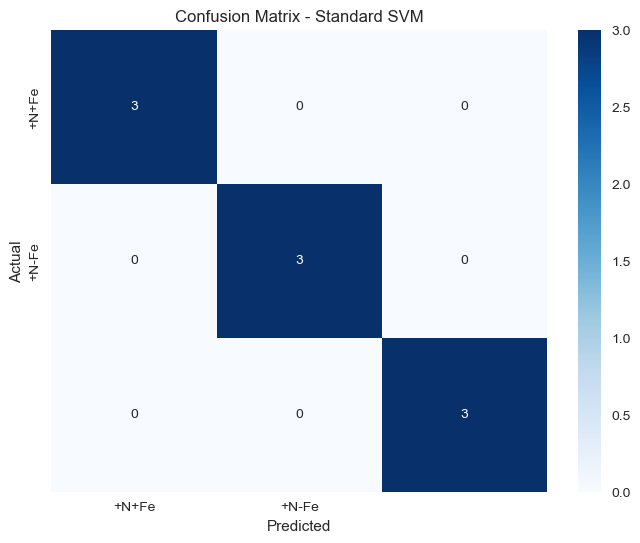

In [144]:
# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 30],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']  # relevant for RBF
}
random_state = 42

# Grid search with 5-fold CV
grid_search_svm = GridSearchCV(SVC(probability=True, random_state=random_state),
                               param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
print("Best parameters for SVM:", best_params_svm)

# Cross-validation results
cv_results_svm = pd.DataFrame(grid_search_svm.cv_results_)
print("\nCross-Validation Scores from GridSearchCV:\n", cv_results_svm[['mean_test_score', 'std_test_score', 'params']])

# Train best model on full training set
model_svm = SVC(**best_params_svm, probability=True, random_state=random_state,max_iter=10000)
model_svm.fit(X_train, y_train)


# Predictions on test set
y_pred_svm = model_svm.predict(X_test)

# Standard prediction evaluation
print("\nStandard SVM - Test Set Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Test Set Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix for SVM predictions
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["+N+Fe", "+N-Fe"], yticklabels=["+N+Fe", "+N-Fe"])
plt.title("Confusion Matrix - Standard SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# # ### Here, we apply SHAP ###
# # Select the appropriate explainer
# # SHAP explainer setup
# if best_params_svm['kernel'] == 'linear':
#     explainer_svm = shap.LinearExplainer(model_svm, X_train)
#     shap_values_svm = explainer_svm.shap_values(X_train)
#     base_values_svm = np.full(shap_values_svm.shape[0], explainer_svm.expected_value)
#     expl_svm = shap.Explanation(
#         shap_values_svm,
#         base_values=base_values_svm,
#         data=X_train,
#         # feature_names=feature_names
#         feature_names=feature_names_reduced
#     )
# else:
#     def svm_proba(X):
#         return model_svm.predict_proba(X)
#     background = shap.sample(X_train, 100)
#     explainer_svm = shap.KernelExplainer(svm_proba, background)
#     shap_values_svm = explainer_svm.shap_values(X_train, nsamples=100)

#     # Combine per-instance explanations for one class (e.g. class 1)
#     shap_matrix = np.array([row[:,1] for row in shap_values_svm])
#     base_values_svm = np.full(shap_matrix.shape[0], explainer_svm.expected_value[1])
#     expl_svm = shap.Explanation(
#         shap_matrix,
#         base_values=base_values_svm,
#         data=X_train,
#         # feature_names=feature_names
#         feature_names=feature_names_reduced
#     )

# # 🧠 SHAP visualizations
# # shap.summary_plot(expl_svm.values, X_train, feature_names=feature_names,max_display=20)
# shap.summary_plot(expl_svm.values, X_train, feature_names=feature_names_reduced,max_display=20)
# shap.plots.bar(expl_svm, max_display=10)
# shap.plots.beeswarm(expl_svm)
# # # shap.plots.waterfall(expl_svm[1])




#### Use the following cell when "Soil" is the intended label, which has 3 values ---> For SVM

In [145]:
# # Use TreeExplainer for Random Forest, on the train set
# explainer_svm = shap.LinearExplainer(model_svm, X_train)
# # Calculate SHAP values
# # shap_values_svm = explainer_svm.shap_values(X_test)
# shap_values_svm = explainer_svm.shap_values(X_train)
# print("SVM shap_values shape is", np.shape(shap_values_svm)) 

# # Ensure X_train is an array
# X_train_array = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
# print(X_train_array)
# # Check the shape of shap_values_svm
# print("SHAP values shape:", shap_values_svm.shape)

# # Generate all SHAP plots for each class
# for i in range(shap_values_svm.shape[2]):
#     print(f"Generating SHAP plots for Class: {le.classes_[i]}")

#     # Ensure the shapes match for the summary plot
#     class_shap_values = shap_values_svm[:, :, i]
    
#     # Create an Explanation object for the current class
#     shap_explanation = shap.Explanation(
#         values=class_shap_values,  # SHAP values for class i
#         base_values=explainer_svm.expected_value[i],  # Base values for class i
#         # data=X_test_array,
#         data=X_train_array,
#         feature_names=feature_names_reduced
#         # feature_names=feature_names
#     )

#     # Summary Plot
#     # shap.summary_plot(shap_explanation,X_train_array, feature_names=feature_names, class_names=le.classes_)
#     shap.summary_plot(shap_explanation, X_train_array, feature_names=feature_names_reduced, class_names=le.classes_)

#     # Bar Plot
#     shap.plots.bar(shap_explanation, max_display=10)

#     # Beeswarm Plot
#     shap.plots.beeswarm(shap_explanation)

#     # # Waterfall Plot for the first instance
#     # shap.plots.waterfall(shap_explanation[0])


In [107]:
# New, for ShapG
# import shapG and necessary libraries
import networkx as nx
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import pearsonr,kendalltau,spearmanr
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname('.'), '..')))
import shapG.shapley as shapley
import shapG.plot as shapGplot
from shapG.utils import corr_generator, create_minimal_edge_graph, matrix_generator, kl, kl_mi_matrix
import lightgbm as lgb
# from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

C:\Users\hassa\anaconda3\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [146]:
# X_train_df = pd.DataFrame(X_train, columns=X.columns)

# # --- NEW: SHAPG Analysis on the Training Set Only ---

# # Step 1: Build the similarity matrix (and graph) using only the training data.
# # This means we only capture feature relationships as seen on X_train.
# W = matrix_generator(X_train_df, kl)
# A, W_new = create_minimal_edge_graph(W, reverse=True, version='v3')
# G = nx.Graph(A)

# # Step 2: Redefine the characteristic function to use only the training set.
# # Here we use an internal train/validation split on X_train & y_train 
# # to evaluate the performance of each feature subset.

# def classification_kpi(G, S):
#     """
#     Characteristic function for SHAPG XAI on the training set.
#     It splits X_train (only the selected columns) into an inner train/validation,
#     trains a logistic regression model (using your tuned hyperparameters),
#     and returns the evaluation score (F1 score) on the validation set.
    
#     Args:
#         G (nx.Graph): The feature graph (not directly used in the function).
#         S (list): A list of feature names (columns) in X_train.
    
#     Returns:
#         float: The F1 score for the model trained on the subset S.
#     """
#     cols = list(S)
#     if len(cols) == 0:
#         return 0
#     else:
#         # Internal split on training data only:
#         X_train_sub, X_val, y_train_sub, y_val = train_test_split(
#             X_train_df[cols], y_train, test_size=0.2, random_state=42
#         )
#         # Use a fixed logistic regression with your best-tuned parameters:
#         model_kpi = SVC(**best_params_svm, probability=True, random_state=random_state)
#         # model_kpi = LogisticRegression(**best_params_lr, max_iter=5000, tol=1e-3, random_state=random_state)
#         model_kpi.fit(X_train_sub, y_train_sub)
#         y_pred = model_kpi.predict(X_val)
#         # For binary or multi-class classification, choose the appropriate averaging.
#         score = f1_score(y_val, y_pred, average='binary')
#         return score

# # Step 3: Run the SHAPG algorithm using the feature graph G and your new KPI function.
# shapley_value = shapley.shapG(G, m=3, f=classification_kpi, approximate_by_ratio=False)

# # Step 4: Visualize the SHAPG results.
# fig, ax = shapGplot(shapley_value, top_n=20, show_plot=False)
# ax.set_xlabel("Feature importance", fontsize=14)
# ax.set_ylabel("Features", fontsize=14)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.set_title('Top 20 Influential Features (SHAPG on Training Set)', fontsize=16)
# plt.show()


In [ ]:
for multiclass


🔍 Running SHAPG for class: Manure


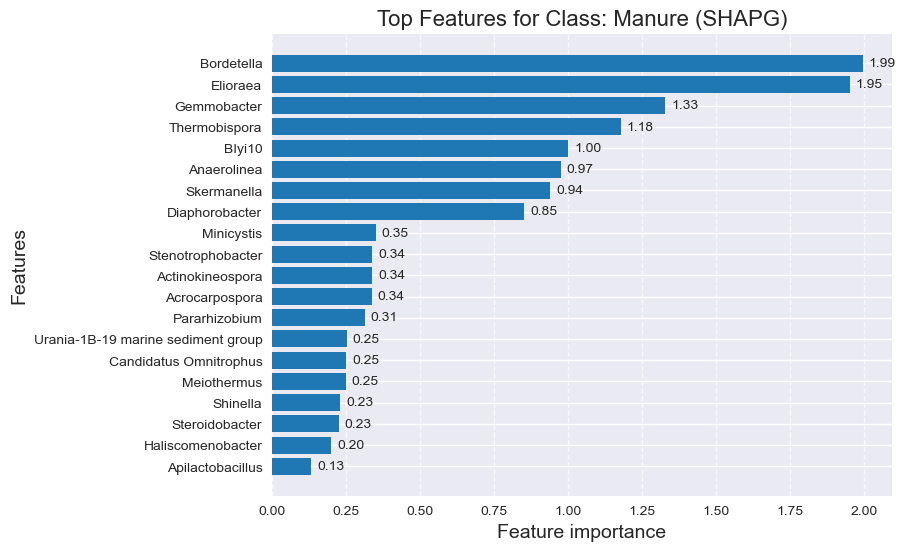


🔍 Running SHAPG for class: Peat


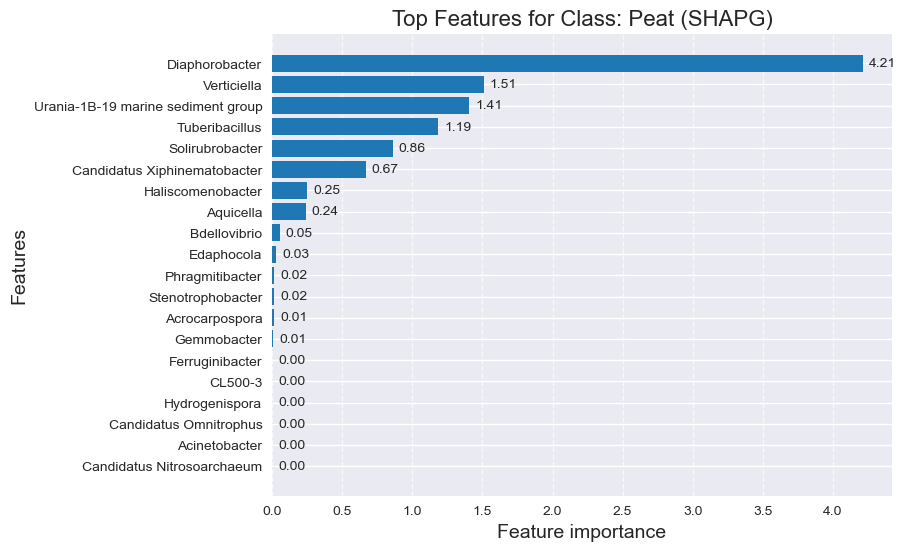


🔍 Running SHAPG for class: Sand


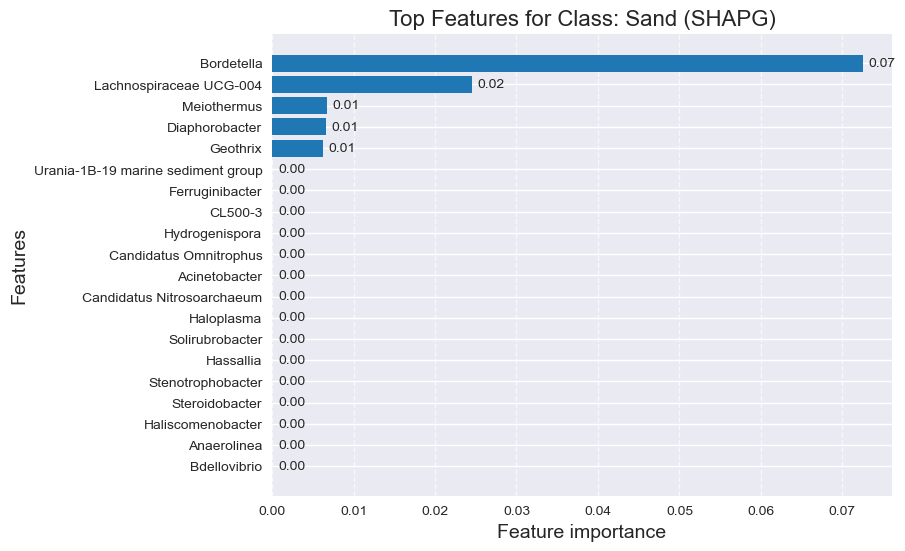

In [147]:
for class_label in np.unique(y_train):
    print(f"\n🔍 Running SHAPG for class: {le.classes_[class_label]}")

    # Create binary labels: 1 for current class, 0 for others
    y_binary = (y_train == class_label).astype(int)

    def classification_kpi(G, S):
        cols = list(S)
        if len(cols) == 0:
            return 0
        else:
            X_train_sub, X_val, y_train_sub, y_val = train_test_split(
                X_train_df[cols], y_binary, test_size=0.2, random_state=42
            )
            model_kpi = SVC(**best_params_svm, probability=True, random_state=random_state)
            model_kpi.fit(X_train_sub, y_train_sub)
            y_pred = model_kpi.predict(X_val)
            score = f1_score(y_val, y_pred, average='binary')
            return score

    # Run SHAPG for this binary setup
    shapley_value = shapley.shapG(G, m=3, f=classification_kpi, approximate_by_ratio=False)

    # Plot results
    fig, ax = shapGplot(shapley_value, top_n=20, show_plot=False)
    ax.set_xlabel("Feature importance", fontsize=14)
    ax.set_ylabel("Features", fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'Top Features for Class: {le.classes_[class_label]} (SHAPG)', fontsize=16)
    plt.show()
